In [1]:
from models.SklearnClassifier import SklearnClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import utils
import time
from Embeddings import Embeddings
from pprint import pprint

# Create the embeddings object
embeddings = Embeddings('../data/doc2vec.npy', '../data/bert.npy', '../data/authors.npy', '../data/authors_encoded.npy', '../pickles/author_encoder.pkl')

In [2]:
def run_svm(X, y, figure_title, scale_features=True):
    if scale_features:
        X = utils.scale_feature_matrix(X)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Oversample the train data
    X_train, y_train = utils.over_sample(X_train, y_train)
    
    # Find the best hyperparameters
    params = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree': [2, 3, 4, 5],
        'gamma': ['scale', 'auto']
    }
    
    clf = SklearnClassifier(SVC())
    # Find the best hyperparameters
    start = time.time()
    clf.hyperparameter_tuning(X_train, y_train, params)
    print('Hyperparameter tuning and training time: ', time.time() - start)
    # Print the best hyperparameters
    print('Best hyperparameters: ', clf.get_best_hyperparams())
    
    # Evaluate the model
    pprint(clf.evaluate(X_test, y_test))
    
    # Get the confusion matrix
    clf.get_confusion_matrix(X_test, y_test, figure_title)

In [3]:
# Load the feature matrix and labels for Doc2Vec
X = embeddings.get_doc2vec()
y = embeddings.get_labels()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..........C=1, degree=4, gamma=auto, kernel=sigmoid; total time= 5.3min
[CV] END ...........C=100, degree=2, gamma=scale, kernel=rbf; total time= 4.2min
[CV] END ..........C=1, degree=5, gamma=scale, kernel=linear; total time= 2.7min
[CV] END ........C=100, degree=3, gamma=scale, kernel=linear; total time= 5.7min
[CV] END ..........C=1, degree=4, gamma=auto, kernel=sigmoid; total time= 3.6min
[CV] END ........C=0.1, degree=5, gamma=auto, kernel=sigmoid; total time= 5.6min
[CV] END ..........C=1, degree=5, gamma=scale, kernel=linear; total time= 1.6min
[CV] END ........C=100, degree=3, gamma=scale, kernel=linear; total time= 1.8min
[CV] END ...........C=10, degree=4, gamma=scale, kernel=poly; total time= 5.8min
[CV] END ..........C=1, degree=4, gamma=auto, kernel=sigmoid; total time= 3.7min
[CV] END ........C=0.1, degree=5, gamma=auto, kernel=sigmoid; total time= 5.7min
[CV] END ..........C=1, degree=5, gamma=scale, k

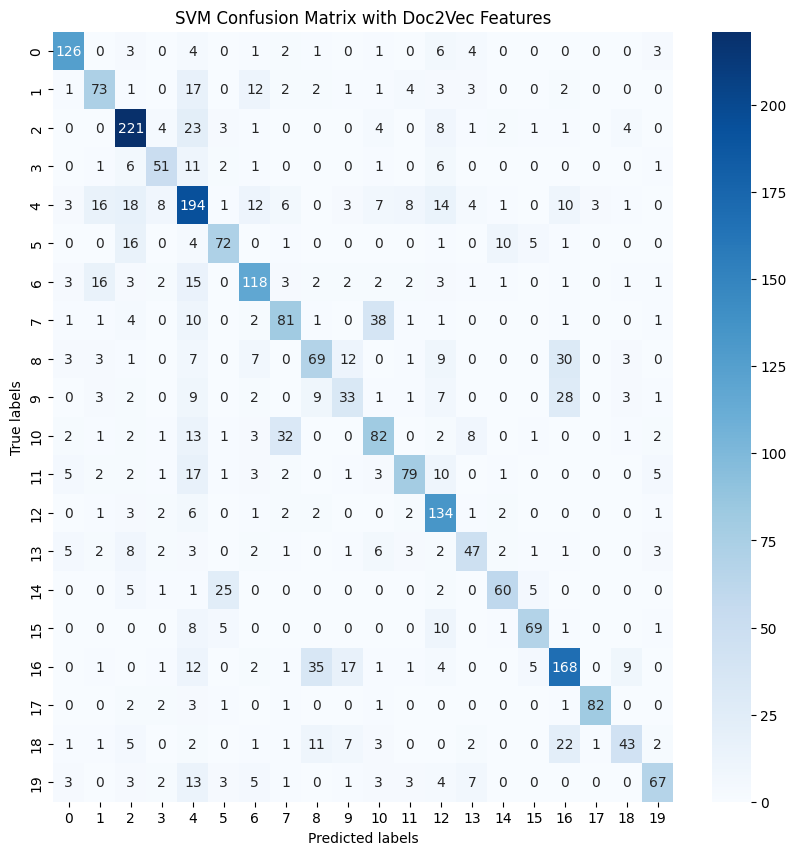

In [4]:
# Run the SVM classifier with Doc2Vec features
run_svm(X, y, 'SVM Confusion Matrix with Doc2Vec Features', scale_features=True)

In [5]:
# Use BERT features
X = embeddings.get_bert()
y = embeddings.get_labels()

[CV] END ..........C=1, degree=3, gamma=scale, kernel=linear; total time= 2.5min
[CV] END .......C=0.1, degree=4, gamma=scale, kernel=sigmoid; total time= 5.6min
[CV] END ...........C=100, degree=2, gamma=scale, kernel=rbf; total time= 3.4min
[CV] END ........C=100, degree=3, gamma=scale, kernel=linear; total time= 3.6min
[CV] END ...........C=0.1, degree=5, gamma=scale, kernel=rbf; total time= 6.9min
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .......C=0.1, degree=4, gamma=scale, kernel=sigmoid; total time=12.1min
[CV] END ...........C=100, degree=2, gamma=scale, kernel=rbf; total time= 2.3min
[CV] END ............C=10, degree=2, gamma=auto, kernel=poly; total time= 2.5min
[CV] END ........C=100, degree=3, gamma=scale, kernel=linear; total time= 1.5min
[CV] END ...........C=10, degree=4, gamma=scale, kernel=poly; total time= 2.1min
[CV] END .......C=0.1, degree=4, gamma=scale, kernel=sigmoid; total time= 8.5min
[CV] END ...........C=100, degree=2, gamma=scale

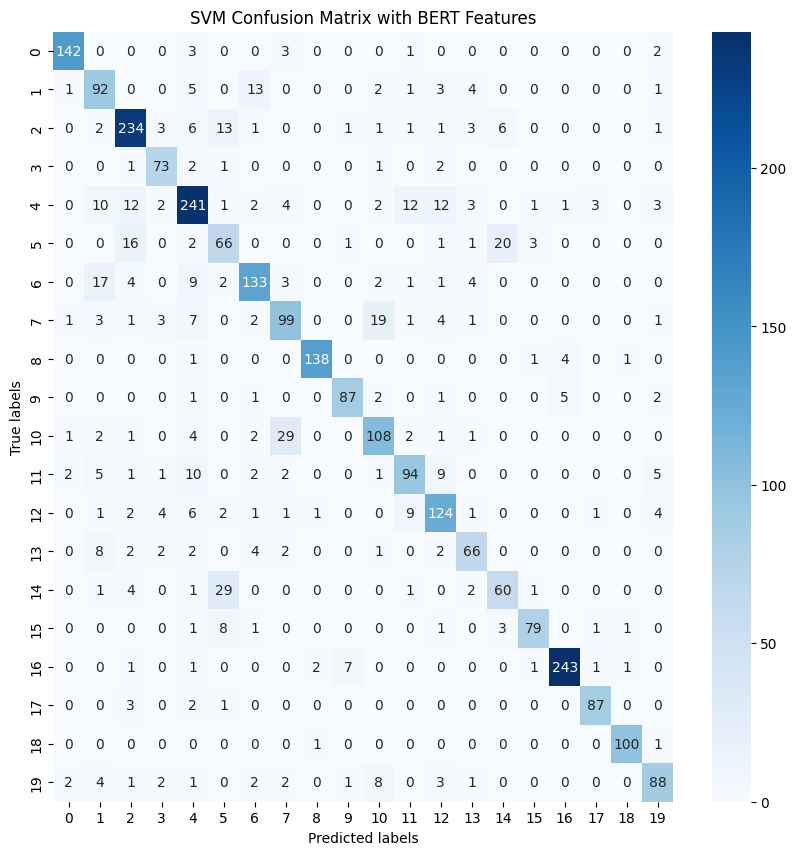

In [6]:
# Run the SVM classifier with BERT features
run_svm(X, y, 'SVM Confusion Matrix with BERT Features', scale_features=False)